In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 1. Analyse the data using the visualizations

In [2]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\KNN\KNN\Zoo.csv")

In [3]:
df.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


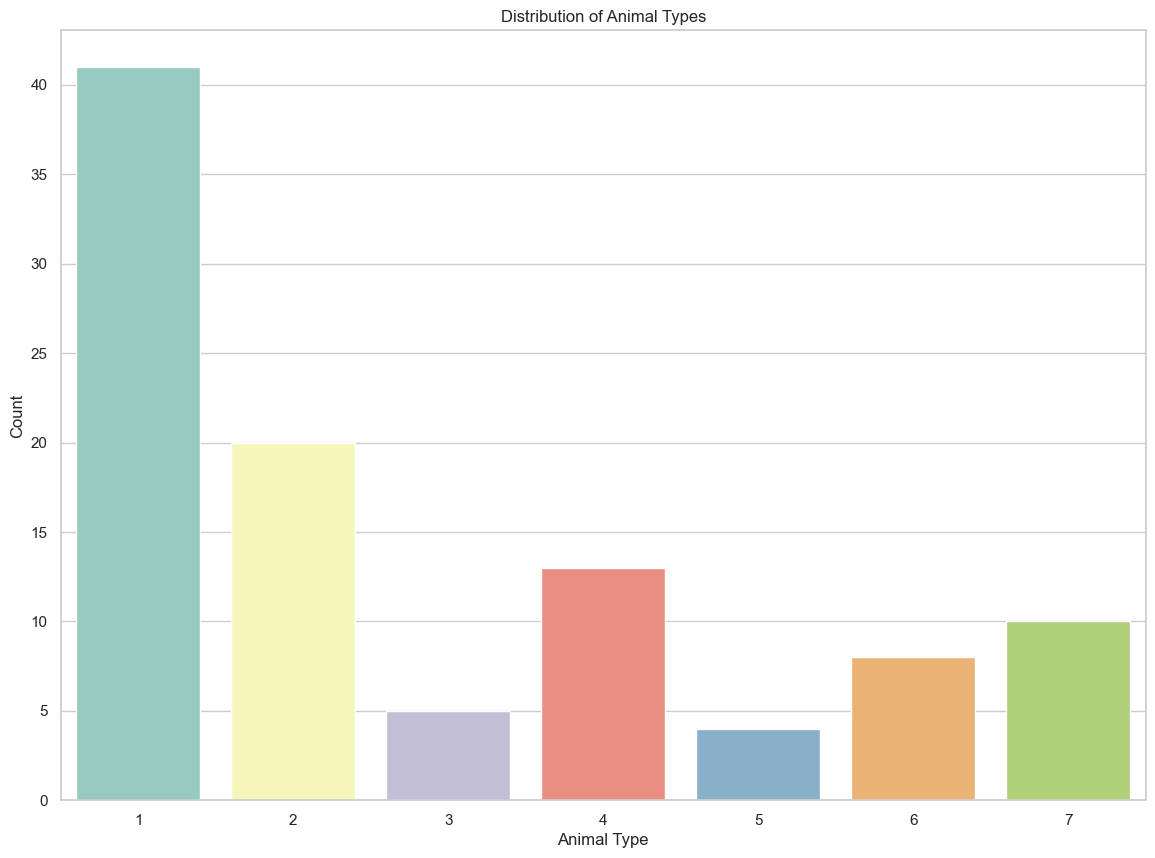

In [6]:
# Set the visual style
sns.set(style="whitegrid")

# Plot the distribution of the 'type' variable
plt.figure(figsize=(14, 10))
sns.countplot(x='type', data=df, hue='type', palette="Set3", legend=False)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

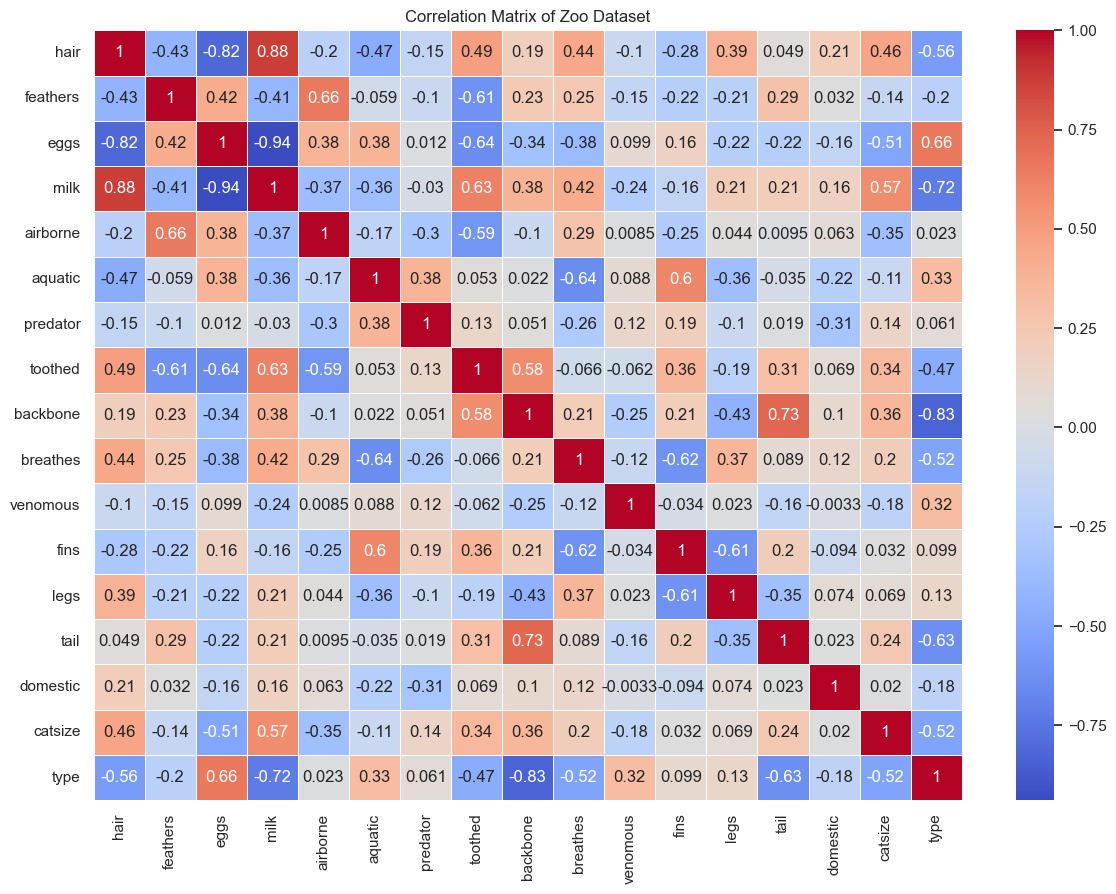

In [7]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.drop(columns=['animal name']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Zoo Dataset')
plt.show()

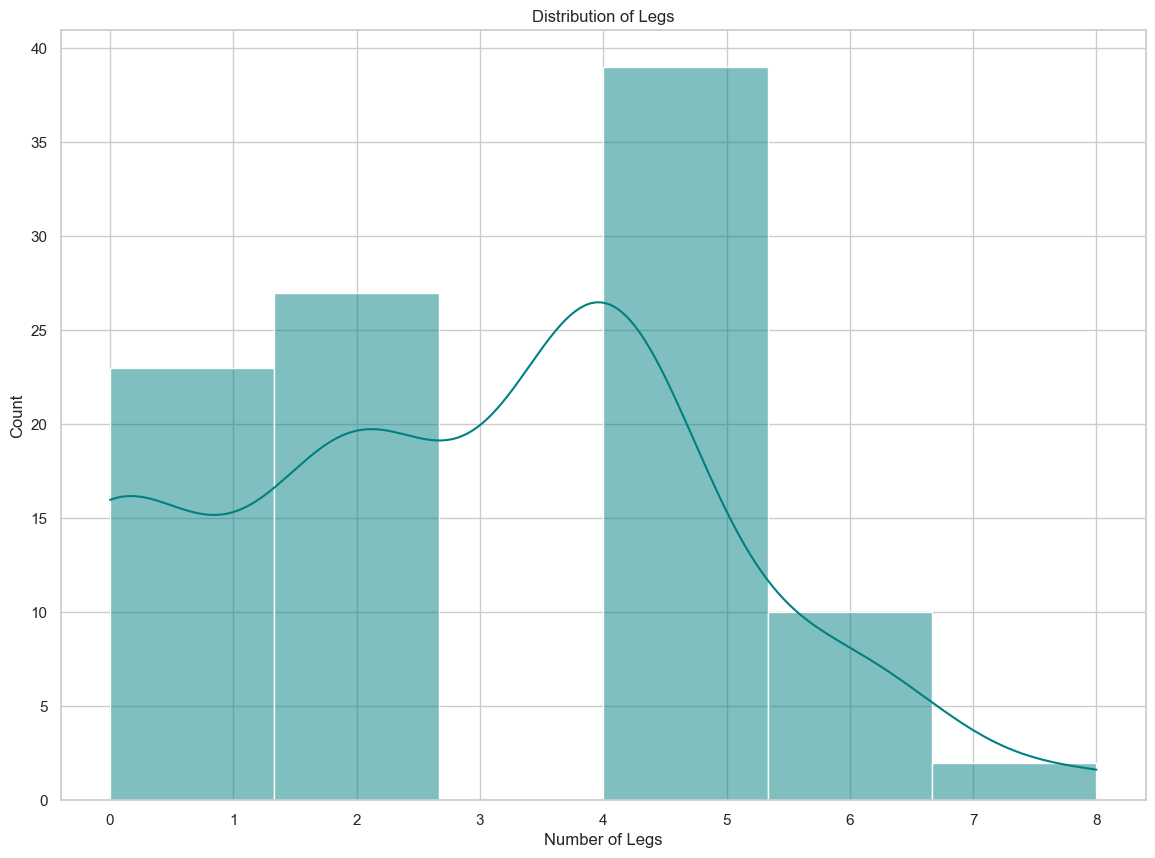

In [8]:
# Plot distribution of the 'legs' feature
plt.figure(figsize=(14, 10))
sns.histplot(df['legs'], kde=True, bins=6, color='teal')
plt.title('Distribution of Legs')
plt.xlabel('Number of Legs')
plt.ylabel('Count')
plt.show()

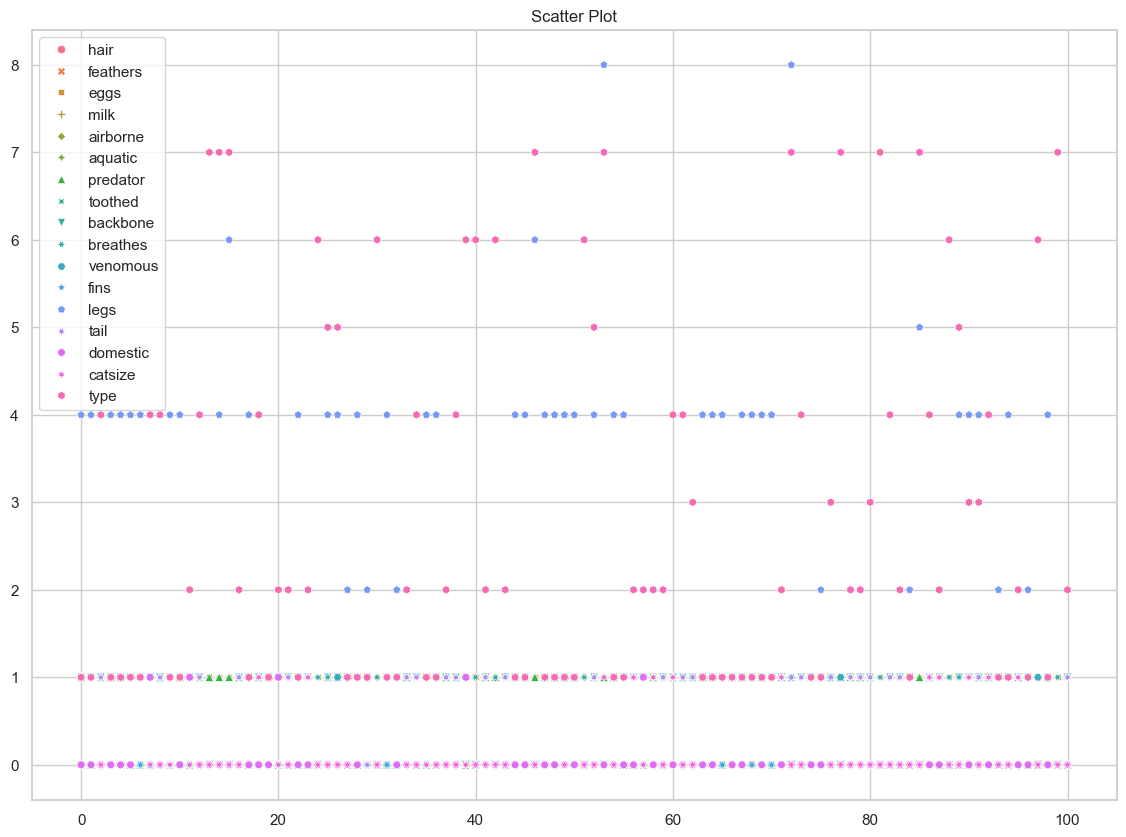

In [9]:
plt.figure(figsize=(14, 10))
sns.scatterplot(df)
plt.title('Scatter Plot')
plt.show()

# 2. Preprocess the data by handling missing values & Outliers, if any.

In [10]:
missing_values = df.isnull().sum()

In [11]:
missing_values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
# Check for outliers using the IQR method on the 'legs' feature since it's a continuous variable
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['legs'] < (Q1 - 1.5 * IQR)) | (df['legs'] > (Q3 + 1.5 * IQR))]

outliers

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7


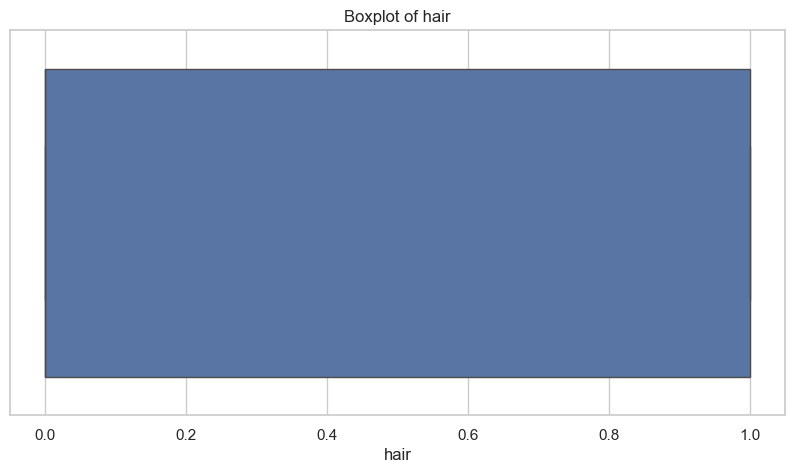

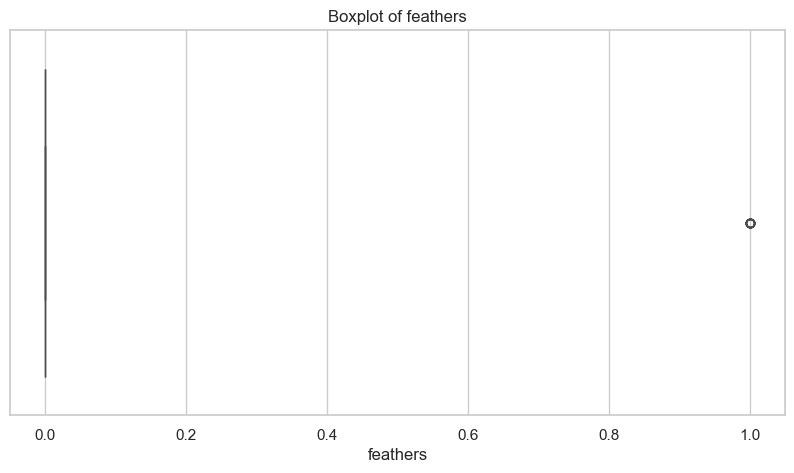

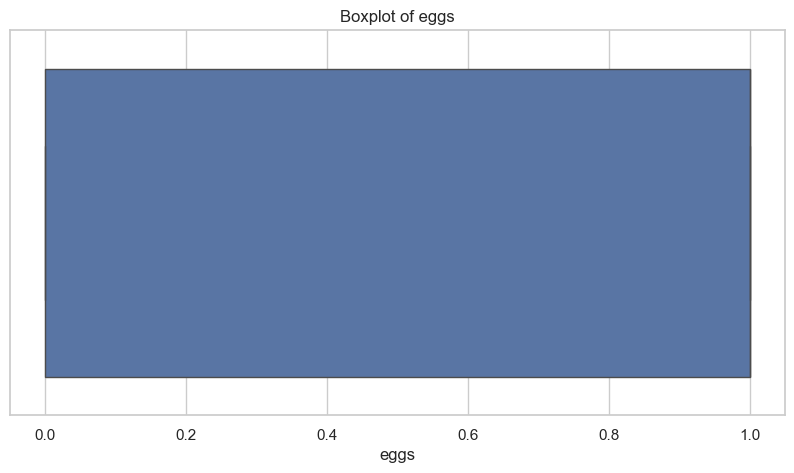

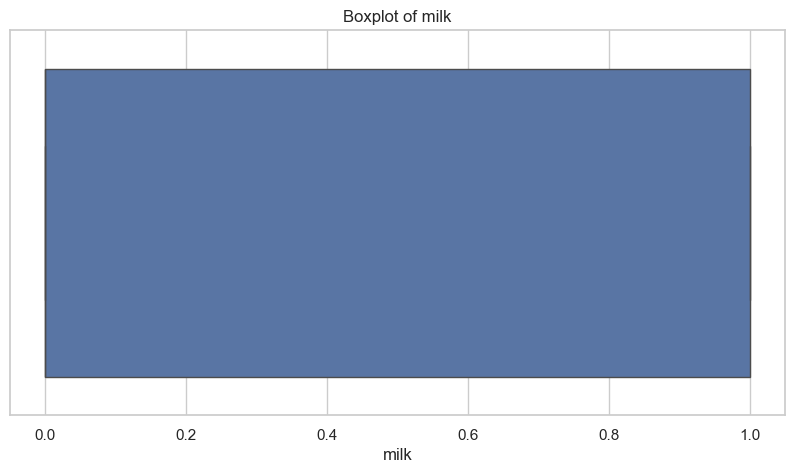

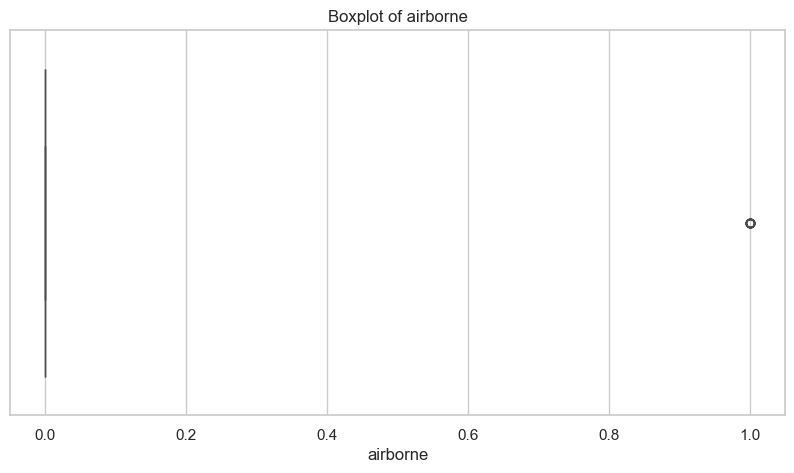

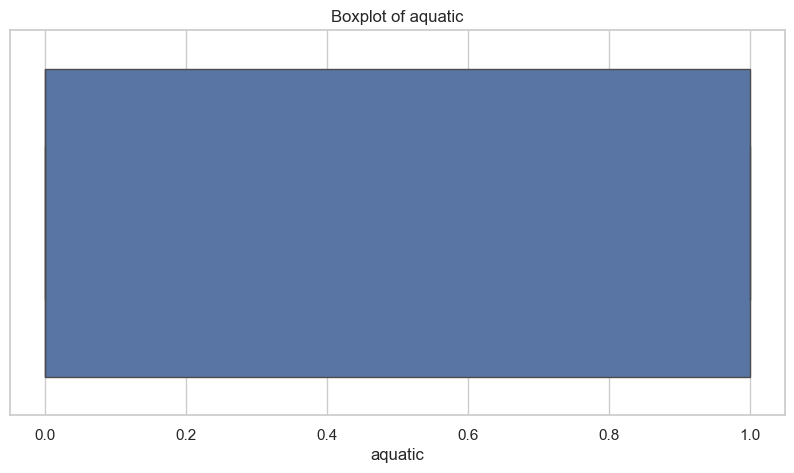

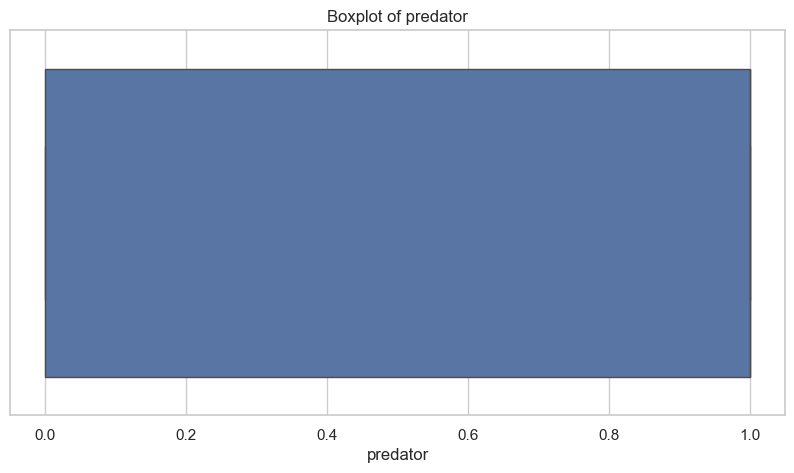

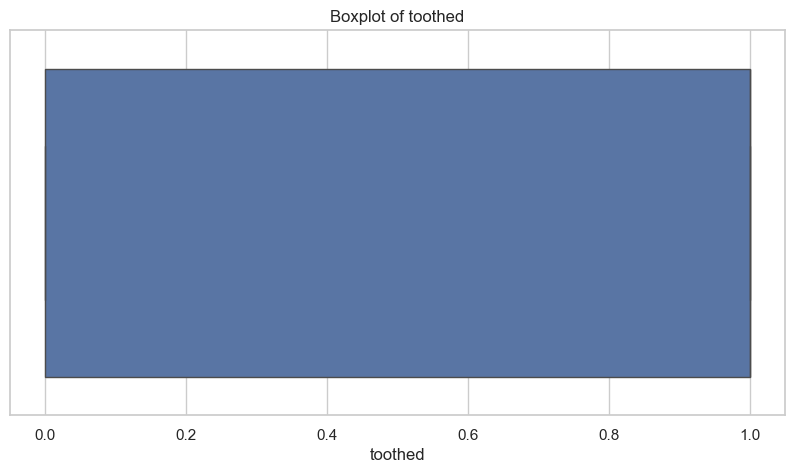

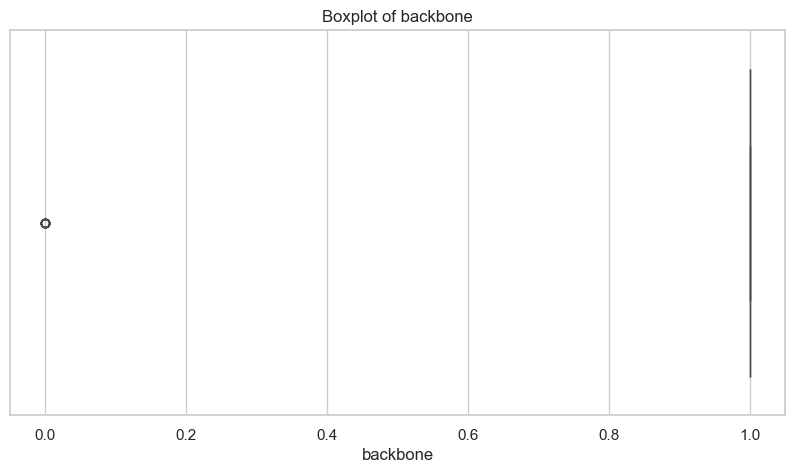

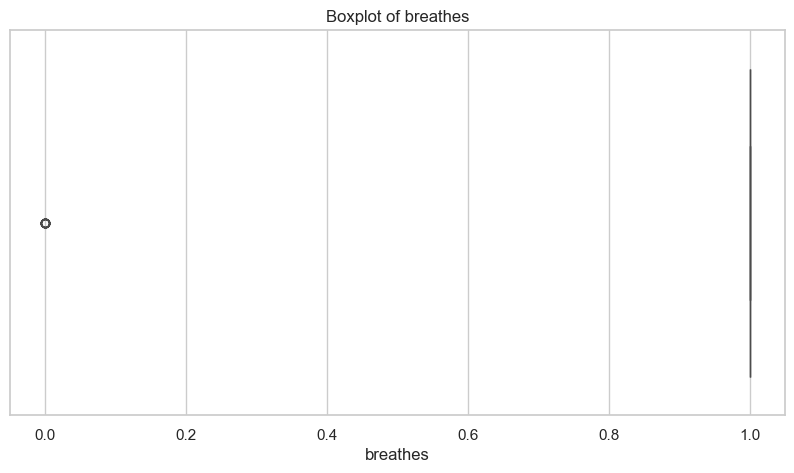

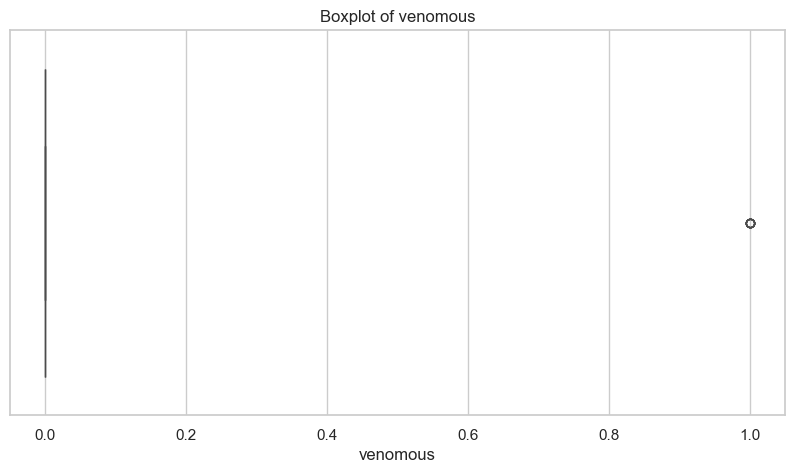

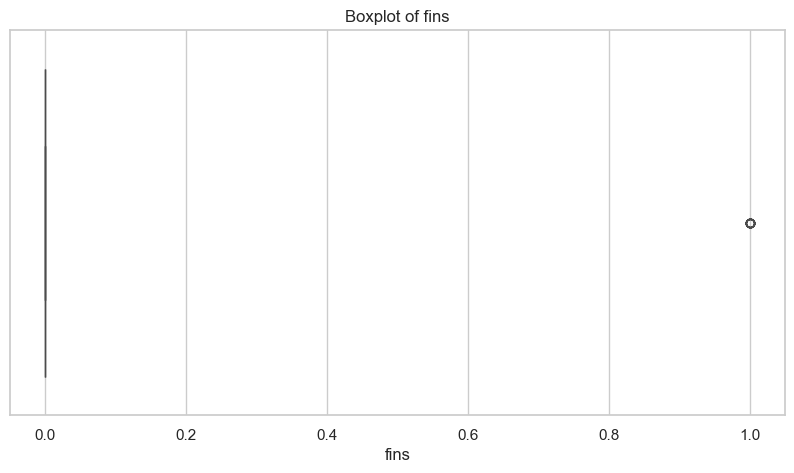

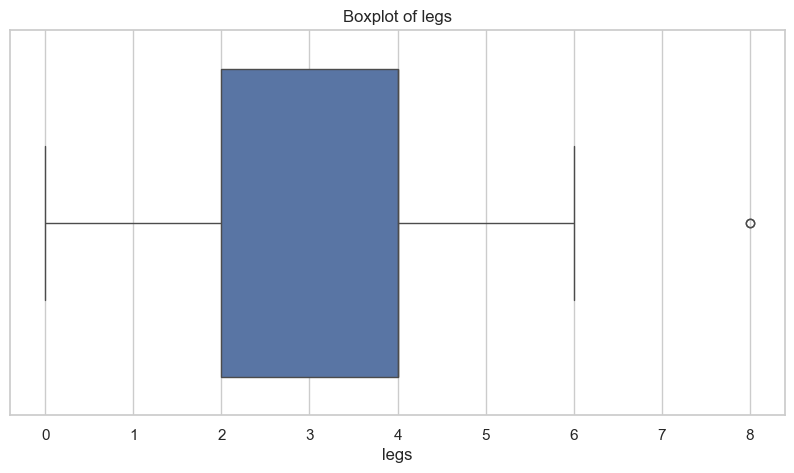

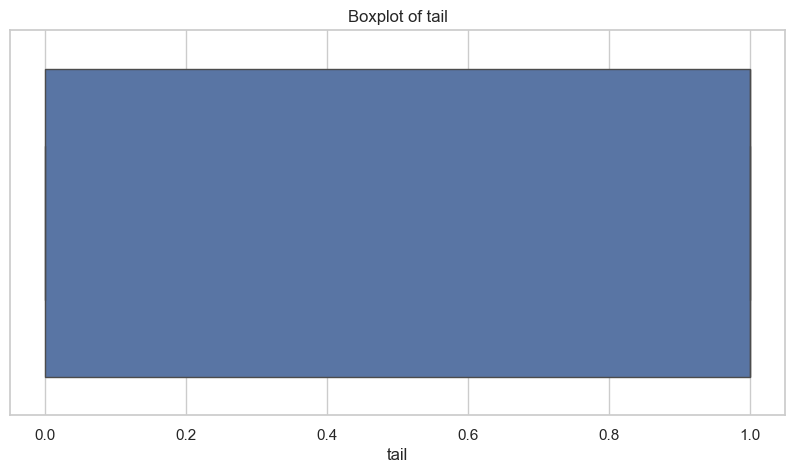

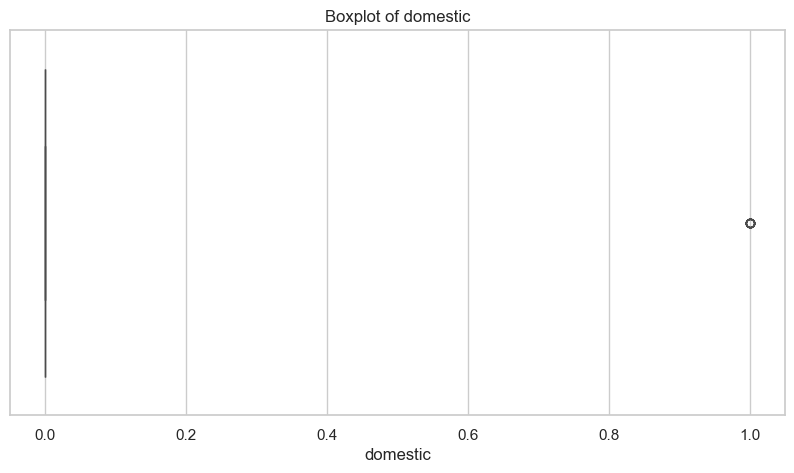

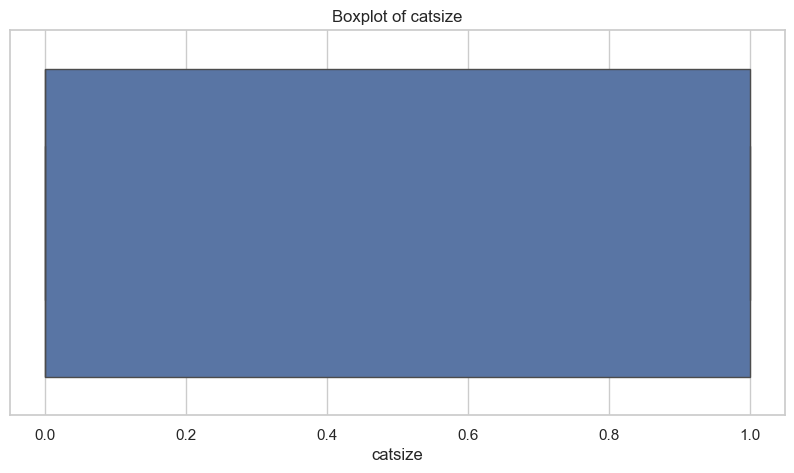

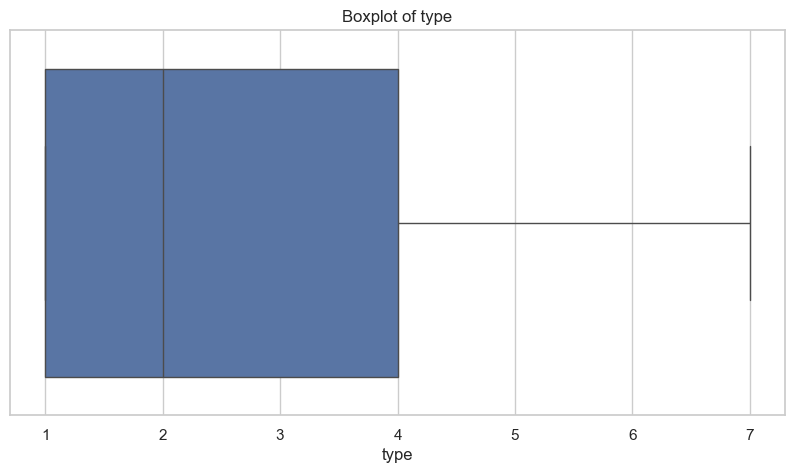

In [13]:
# Plotting boxplots for numerical features to identify outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [14]:
# Drop the 'animal name' column and separate features from the target variable
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# To check the size of the splits
X_train.shape, X_test.shape

((80, 16), (21, 16))

# 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
# 5. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [15]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [17]:
y_pred = knn.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy  : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-Score  : {f1}')


Accuracy  : 0.9523809523809523
Precision : 0.9166666666666666
Recall    : 0.9523809523809523
F1-Score  : 0.9319727891156462


# 6. Choose an appropriate distance metric and value for K.

In [19]:
# Define the KNN model
knn = KNeighborsClassifier()

# Set up the grid of hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],'metric': ['euclidean', 'manhattan']}

# GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best K                         : {best_params['n_neighbors']}")
print(f"Best Distance Metric           : {best_params['metric']}")
print(f"Best Cross-Validation Accuracy : {best_score}")

Best K                         : 3
Best Distance Metric           : manhattan
Best Cross-Validation Accuracy : 0.9121557454890787


# 7. Visualize the decision boundaries of the classifier.

In [23]:
# Step 1: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain the KNN model on the reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [24]:
# Step 2: Plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

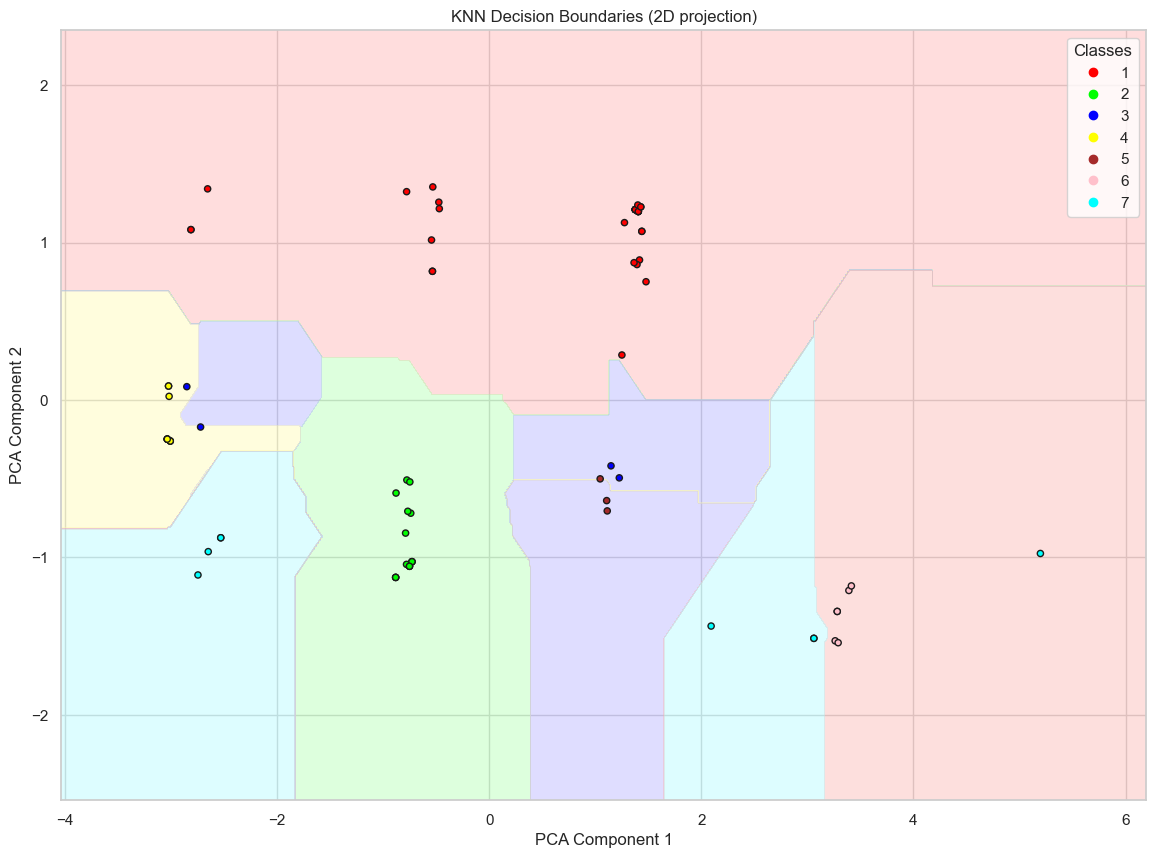

In [33]:
# Step 3: Visualize
plt.figure(figsize=(14, 10))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFAAA', '#AFAAFF', '#FAAFAA', '#AAFAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#A52A2A', '#FFC0CB', '#00FFFF']

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=20)

# Add legend
legend_labels = list(np.unique(y_train))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Decision Boundaries (2D projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Interview Questions:

### 1. What are the key hyperparameters in KNN?

In [21]:
""" 1. Number of Neighbors
    2. Distance Metric
    3. Weight Function
    4. Algorithm
    5. Leaf Size
    6. Metric Parameters """

' 1. Number of Neighbors\n    2. Distance Metric\n    3. Weight Function\n    4. Algorithm\n    5. Leaf Size\n    6. Metric Parameters '

### 2. What distance metrics can be used in KNN?

In [22]:
""" 1. Euclidean Diatance (default for continuous variables)
    2. Manhattan Distance
    3. Minkowski Distance (a generalization that can be adjusted using the P parameter)
    4. Hamming Distance (useful for categorical variables) """   

' 1. Euclidean Diatance (default for continuous variables)\n    2. Manhattan Distance\n    3. Minkowski Distance (a generalization that can be adjusted using the P parameter)\n    4. Hamming Distance (useful for categorical variables) '